In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, re

In [2]:
OUTPUT_PATH = "/Users/c3t0/Desktop/openmpi_assignment/outputs/"
fill_types = ["asc", "rand"]
work_types = ["fixed", "imbalanced"]
nr_procs = ["1", "2", "4", "8"]


In [11]:
df = pd.DataFrame(columns={"nr_procs": 0, "fill_type": 0, "work_type": 0, "time": 0})
run = dict({"nr_procs": 0, "fill_type": 0, "work_type": 0, "time": 3})

for file in os.listdir(OUTPUT_PATH):
    file_path = OUTPUT_PATH + file
    f = open(file_path, "r", errors='ignore')
    for line in f.readlines():
        if line != '\n':
            fill_type = re.findall(r'(rand|asc)', line)
            work_type = re.findall(r'imbalanced', line)
            nr_proc = re.findall(r'\d processors', line)
            time = float(line.split(":")[-1])

            run["fill_type"] = fill_type[0]
            run["work_type"] = work_type[0] if work_type != [] else "fixed"

            if nr_proc != []:
                run["nr_procs"] = int(nr_proc[0][0])
            else:
                run["nr_procs"] = 1

            run["time"] = time    
        
        df = df.append(run, ignore_index=True)

/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_work_8.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_work_8.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_work_8.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_work_8.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_work_8.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_work_8.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/asc_imb_work_9.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/asc_imb_work_9.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/asc_imb_work_9.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/asc_imb_work_9.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/asc_imb_work_9.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_imb_work_9.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_imb_work_9.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_imb_work_9.txt
/Users/c3t0/Desktop/openmpi_assignment/outputs/rand_imb_work_9.txt
/Users/c3t0/Desktop/open

In [12]:
# Get the average per number of processor, work_type, and fill_type
df_avg = pd.DataFrame(columns={"nr_procs": 0, "fill_type": 0, "work_type": 0, "time": 0})
for nr_proc in nr_procs:
    for fill_type in fill_types:
        for work_type in work_types:
            avg_time = df[( df["work_type"] == work_type) & (df["fill_type"] == fill_type) & (df["nr_procs"] == int(nr_proc) )]["time"].mean(axis=0)
            df_avg = df_avg.append({"nr_procs": nr_proc, "fill_type": fill_type, "work_type": work_type, "time": avg_time}, ignore_index=True)
            
df_avg

,nr_procs,fill_type,work_type,time
0,1,asc,fixed,442.244870
1,1,asc,imbalanced,353.461169
2,1,rand,fixed,328.780876
3,1,rand,imbalanced,349.869428
4,2,asc,fixed,173.951698
5,2,asc,imbalanced,181.990544
6,2,rand,fixed,195.380937
7,2,rand,imbalanced,169.510041
8,4,asc,fixed,92.844662
9,4,asc,imbalanced,94.468397


In [29]:

# speedup = time / p_time # (Time on 1 CPU) / (Time on p CPUs) 
# efficiency = speedup / p

df_eff = pd.DataFrame()

for fill_type in fill_types:
    for work_type in work_types:
        df_temp = df_avg[(df_avg["fill_type"] == fill_type) & (df_avg["work_type"] == work_type)]
        base_time = df_temp[df_temp['nr_procs'] == '1']['time'].values[0] 
        speedups = {
            '1': 1,
            '2': base_time / df_temp[df_temp['nr_procs'] == '2']['time'].values[0],
            '4': base_time / df_temp[df_temp['nr_procs'] == '4']['time'].values[0],
            '8': base_time / df_temp[df_temp['nr_procs'] == '8']['time'].values[0]
        }
        df_temp['efficiency'] = [speedups['1'], speedups['2'] / 2, speedups['4'] / 4, speedups['8'] / 8]
        df_temp['speedup'] = [speedups['1'], speedups['2'], speedups['4'], speedups['8']]
        df_eff = df_eff.append(df_temp, ignore_index=True)
        
df_eff.to_csv("eff_table.csv")

/var/folders/wb/1c2455fj7db13ry907z2qlgc0000gn/T/ipykernel_9375/4230986844.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['efficiency'] = [speedups['1'], speedups['2'] / 2, speedups['4'] / 4, speedups['8'] / 8]
/var/folders/wb/1c2455fj7db13ry907z2qlgc0000gn/T/ipykernel_9375/4230986844.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['speedup'] = [speedups['1'], speedups['2'], speedups['4'], speedups['8']]


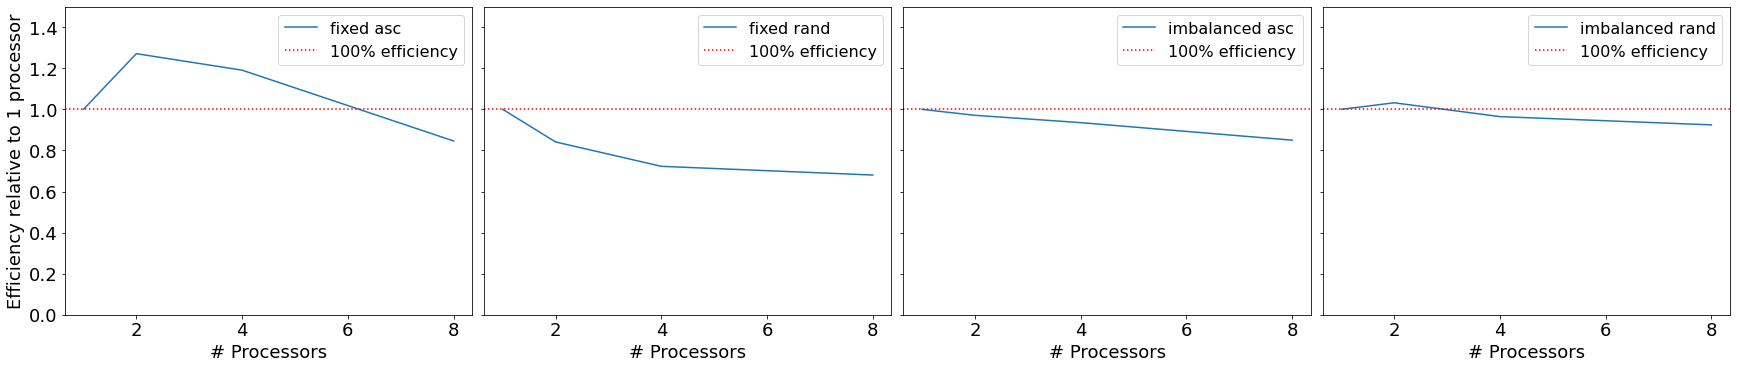

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(24, 5), constrained_layout=True, sharey=True)

df_eff['nr_procs'] = [int(p) for p in df_eff['nr_procs'].values]

i = 0

for work_type in work_types:
    for fill_type in fill_types:
        df_temp = df_eff[(df_eff['work_type'] == work_type) & (df_eff['fill_type'] == fill_type)]
        ax[i].plot(df_temp["nr_procs"], df_temp['efficiency'], label=work_type + " " + fill_type)
        ax[i].set_xlabel("# Processors", fontsize=18)
        ax[0].set_ylabel("Efficiency relative to 1 processor", fontsize=18)
        ax[i].set_ylim(0, 1.5)
        ax[i].axhline(y=1, xmin=0, xmax=8, color='r', ls='dotted', label='100% efficiency')
        ax[i].legend(loc='upper right', fontsize=16)
        ax[i].tick_params(axis='both', which='major', labelsize=18)
        ax[i].tick_params(axis='both', which='minor', labelsize=16)
        i += 1
        
plt.savefig("efficiency_curve.pdf", dpi=100)

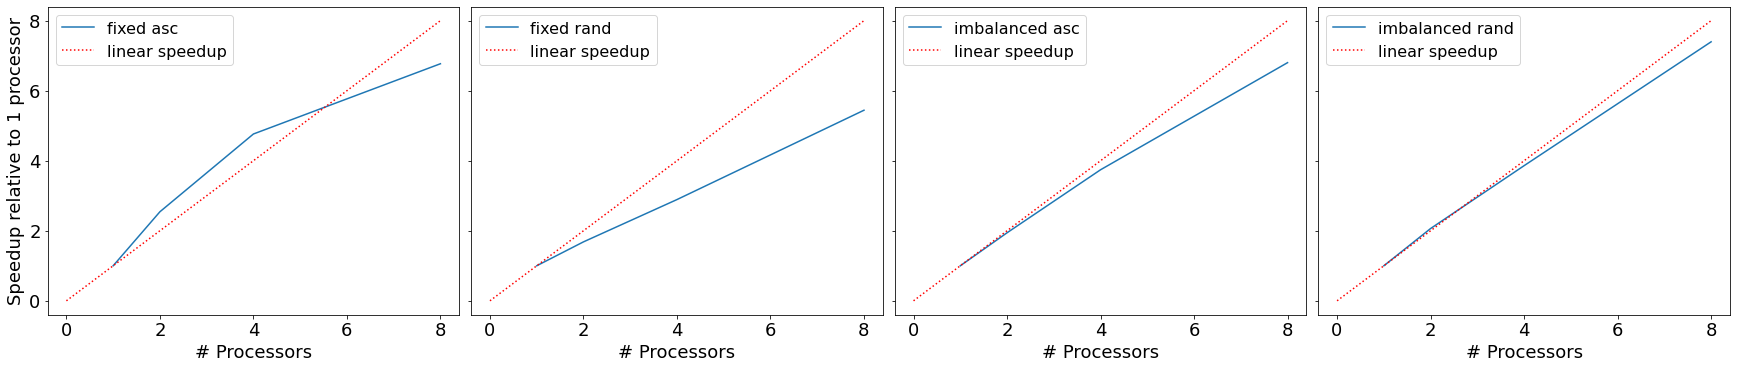

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(24, 5), constrained_layout=True, sharey=True)

df_eff['nr_procs'] = [int(p) for p in df_eff['nr_procs'].values]

i = 0

for work_type in work_types:
    for fill_type in fill_types:
        df_temp = df_eff[(df_eff['work_type'] == work_type) & (df_eff['fill_type'] == fill_type)]
        ax[i].plot(df_temp["nr_procs"], df_temp['speedup'], label=work_type + " " + fill_type)
        ax[i].plot(range(0, 9), range(0, 9), label="linear speedup", ls='dotted', c='red')
        ax[i].set_xlabel("# Processors", fontsize=18)
        ax[0].set_ylabel("Speedup relative to 1 processor", fontsize=18)
        ax[i].legend(loc='upper left', fontsize=16)
        ax[i].tick_params(axis='both', which='major', labelsize=18)
        ax[i].tick_params(axis='both', which='minor', labelsize=16)
        i += 1
        
plt.savefig("speedup_curve.pdf", dpi=100)